In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14
})

In [48]:
def gauss(x, A, B, C, x_0):
    return A * np.exp(-B * (x-x_0) ** 2) + C

def linear_model(x,a,b):
    return a * x + b

def two_rabi(x, A0, A1, b0, b1, c0, c1, d0, d1, x_0, x_1):
    return A0*np.sin(b0*(x-x_0))*np.exp(-c0*(x)) + d0 + A1*np.sin(b1*(x-x_1))*np.exp(-c1*(x)) + d1

def exp_decay(x, A, b, c, x0):
    return A*np.exp(-b*(x-x0)) + c

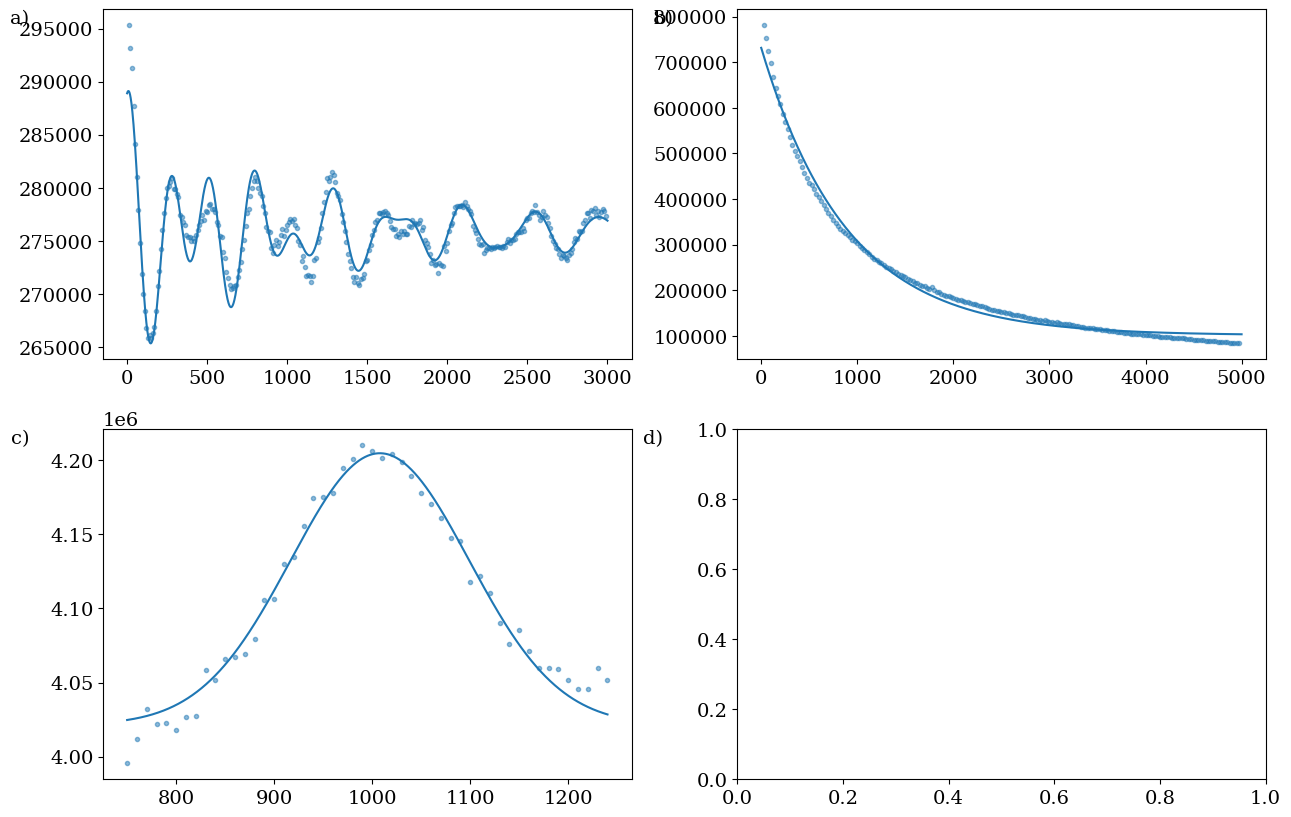

In [79]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4= axes.flatten()

ax1.text(-0.14, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.12, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')
ax3.text(-0.14, 1, "c)", transform=ax3.transAxes,fontsize=14, va='top', ha='right')
ax4.text(-0.14, 1, "d)", transform=ax4.transAxes,fontsize=14, va='top', ha='right')

time_rabi, counts_rabi = np.loadtxt("data/rabi/FoPra-Rabi-1-data.csv", unpack=True)

popt, pcov = curve_fit(two_rabi, time_rabi[1:], counts_rabi[1:], p0=[10000, 14000, 1/20, 1/45, 1/1250, 1/1300, 140000, 140000, -30, 20], absolute_sigma=True)
x_lin = np.linspace(0, 3000, 3000)
ax1.plot(time_rabi[1:],counts_rabi[1:], ".", alpha=0.5)
ax1.plot(x_lin, two_rabi(x_lin, *popt), color="C0")

time_hahn_decay, counts_hahn_decay = np.loadtxt("data/hahn_decay/FoPra-HahnEcho-Decay-Retake-data.csv", unpack=True)
popt, pcov = curve_fit(exp_decay, time_hahn_decay[1:], counts_hahn_decay[1:], p0=[700000, 1/1000, 10000, 0], absolute_sigma=True)
x_lin = np.linspace(0, 5000, 3000)
ax2.plot(time_hahn_decay[1:] ,counts_hahn_decay[1:], ".", alpha=0.5)
ax2.plot(x_lin, exp_decay(x_lin, *popt), color="C0")

time_hahn_echo, counts_hahn_echo = np.loadtxt("data/hahn_echo/FoPra-HahnEcho_1-data.csv", unpack=True)
popt, pcov = curve_fit(gauss, time_hahn_echo[1:], counts_hahn_echo[1:], p0=[0.22*1e6, 1/25000, 3.98*1e6, 1000], absolute_sigma=True)
x_lin = np.linspace(min(time_hahn_echo[1:]), max(time_hahn_echo[1:]), 3000)
ax3.plot(time_hahn_echo[1:], counts_hahn_echo[1:], ".", alpha=0.5)
ax3.plot(x_lin, gauss(x_lin, *popt), color="C0")

#plt.savefig('Rabi.pdf', bbox_inches='tight')  

/var/folders/6r/58697_t90t94wvdzw0xdvzj00000gn/T/ipykernel_37632/1405964984.py:2: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-B * (x-x_0) ** 2) + C


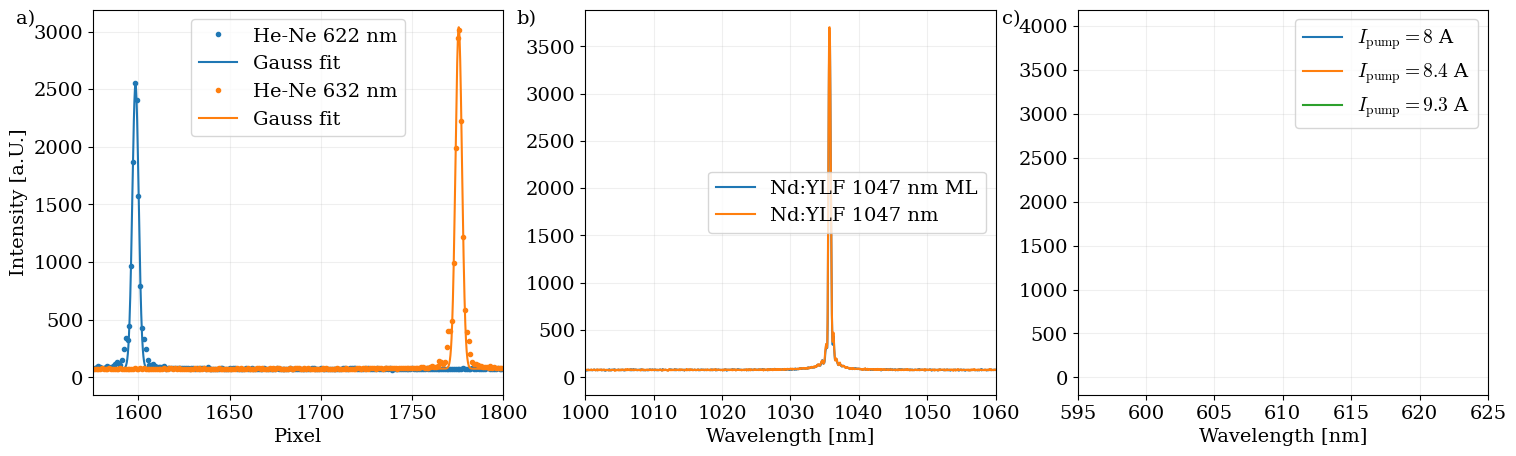

In [167]:
plt.rcParams["figure.figsize"] = (18,5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.text(-0.14, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.12, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')
ax3.text(-0.14, 1, "c)", transform=ax3.transAxes,fontsize=14, va='top', ha='right')


plt.savefig('sslaser.pdf', bbox_inches='tight')  
